In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [40]:
class LinearRegression:
    def __init__(self, lr: float = 0.2, thr: float = 0.00000001, n_epochs: int = 10000000):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([random.uniform(-5, 5),
                           random.uniform(-5, 5),
                           random.uniform(-5, 5)])
        print(f"Init w: {self.w}")

    def predict(self, X: np.ndarray) -> list:
        return X @ self.w 


    def update_w(self, X: np.array, y: np.array):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        # w = w - lr / m * XT @ (w @ X - y)
        m = len(y)

        h = self.predict(X)

        self.w -= self.lr / m * X.T @ (h - y)

    def fit(self, X: np.array, y: np.array):
        last_cost = 1000000
        print(f"X.shape {X.shape}, y.shape {y.shape}")

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost
        return self.w
            
            
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

# Нормалізація данних

### За допомогою MinMaxScaler()

In [5]:
scaler = MinMaxScaler()

new_df = pd.DataFrame()
new_df_price = pd.DataFrame()

new_df_price['price'] = df['price']

new_df['area'] = df['area']
new_df['bedrooms'] = df['bedrooms']
new_df['bathrooms'] = df['bathrooms']

normalize_df = scaler.fit_transform(new_df)
normalize_df_price = scaler.fit_transform(new_df_price)


In [6]:
normalize_df

array([[0.39656357, 0.6       , 0.33333333],
       [0.5024055 , 0.6       , 1.        ],
       [0.57113402, 0.4       , 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        ],
       [0.08659794, 0.4       , 0.        ],
       [0.15120275, 0.4       , 0.        ]])

In [7]:
normalize_df_price

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [9]:
X = np.array(normalize_df)
y = np.array(normalize_df_price)
y = np.squeeze(normalize_df_price)

In [10]:
X

array([[0.39656357, 0.6       , 0.33333333],
       [0.5024055 , 0.6       , 1.        ],
       [0.57113402, 0.4       , 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        ],
       [0.08659794, 0.4       , 0.        ],
       [0.15120275, 0.4       , 0.        ]])

In [11]:
X.shape

(545, 3)

In [12]:
y

array([1.        , 0.90909091, 0.90909091, 0.90606061, 0.83636364,
       0.78787879, 0.72727273, 0.72727273, 0.7030303 , 0.6969697 ,
       0.6969697 , 0.68666667, 0.65454545, 0.64848485, 0.64848485,
       0.63636364, 0.63636364, 0.62424242, 0.61818182, 0.61515152,
       0.60606061, 0.6       , 0.5969697 , 0.5969697 , 0.59090909,
       0.58787879, 0.58121212, 0.57575758, 0.57575758, 0.57575758,
       0.57575758, 0.57575758, 0.56666667, 0.55757576, 0.55151515,
       0.54813333, 0.54484848, 0.53939394, 0.53787879, 0.53333333,
       0.53030303, 0.52727273, 0.51515152, 0.51515152, 0.5030303 ,
       0.5030303 , 0.5       , 0.4969697 , 0.49393939, 0.49090909,
       0.49090909, 0.49090909, 0.48484848, 0.48484848, 0.48484848,
       0.48484848, 0.48424242, 0.47575758, 0.47272727, 0.47272727,
       0.46666667, 0.46060606, 0.46060606, 0.45757576, 0.45454545,
       0.44848485, 0.44848485, 0.44545455, 0.44242424, 0.43636364,
       0.43636364, 0.43333333, 0.43030303, 0.42727273, 0.42424

In [13]:
y.shape

(545,)

In [14]:
copy_X = np.copy(X)
for i in range(len(X)):
    copy_X[i] = [1] + copy_X[i]

copy_X

array([[1.39656357, 1.6       , 1.33333333],
       [1.5024055 , 1.6       , 2.        ],
       [1.57113402, 1.4       , 1.33333333],
       ...,
       [1.13539519, 1.2       , 1.        ],
       [1.08659794, 1.4       , 1.        ],
       [1.15120275, 1.4       , 1.        ]])

In [41]:
linear_regression = LinearRegression()

w_lr = linear_regression.fit(copy_X, y)

Init w: [-3.71464181  1.7571669  -1.28115167]
X.shape (545, 3), y.shape (545,)
0, [-2.74641283  2.82181937 -0.4328069 ], 0.19392140894176604
1, [-2.68059909  2.87287377 -0.38377977], 0.16868861912671526
2, [-2.66638859  2.86604721 -0.38041964], 0.1674616943511183
3, [-2.65516781  2.85594697 -0.37966475], 0.1663215782598927
4, [-2.64415891  2.84569307 -0.37905469], 0.1651901188618566
5, [-2.63320302  2.83546366 -0.37844892], 0.16406699818445472
6, [-2.62229089  2.82526879 -0.37783944], 0.16295215283992287
7, [-2.61142184  2.81510893 -0.37722584], 0.16184552074755162
8, [-2.60059566  2.80498399 -0.37660813], 0.1607470403031177
9, [-2.58981218  2.79489385 -0.37598635], 0.15965665037251062
10, [-2.57907123  2.78483839 -0.37536054], 0.15857429028807835
11, [-2.56837263  2.77481749 -0.37473072], 0.15749989984501078
12, [-2.55771623  2.76483102 -0.37409695], 0.15643341929775162
13, [-2.54710184  2.75487888 -0.37345926], 0.1553747893564386
14, [-2.53652931  2.74496092 -0.37281769], 0.154323951

728, [-0.00523219  0.09768423  0.1266053 ], 0.010990842661882246
729, [-0.00456922  0.09680498  0.12697186], 0.010984119180270471
730, [-0.00390876  0.09592866  0.12733753], 0.010977441236081822
731, [-0.0032508   0.09505526  0.12770231], 0.010970808517060065
732, [-0.00259533  0.09418478  0.12806621], 0.010964220713120752
733, [-0.00194233  0.09331721  0.12842921], 0.010957677516335878
734, [-0.00129181  0.09245253  0.12879134], 0.010951178620918624
735, [-0.00064374  0.09159073  0.12915258], 0.010944723723208262
736, [1.87090534e-06 9.07318161e-02 1.29512938e-01], 0.010938312521655112
737, [0.00064505 0.08987576 0.12987242], 0.01093194471680564
738, [0.00128579 0.08902257 0.13023102], 0.010925620011287664
739, [0.00192411 0.08817222 0.13058875], 0.010919338109795645
740, [0.00256002 0.08732471 0.1309456 ], 0.010913098719076107
741, [0.00319352 0.08648003 0.13130158], 0.01090690154791314
742, [0.00382463 0.08563817 0.13165669], 0.010900746307114031
743, [0.00445335 0.08479911 0.132010

In [43]:
w = np.linalg.inv(copy_X.T @ copy_X) @ copy_X.T @ y
print(f'w -->: {w}')

w -->: [ 0.17319321 -0.16778831  0.26182743]


In [29]:
X[:, 0].shape

(545,)

In [30]:
y.shape

(545,)

In [31]:
def predict(w0, w1, w2, x):
    return w0 + w1 * x + w2 * x

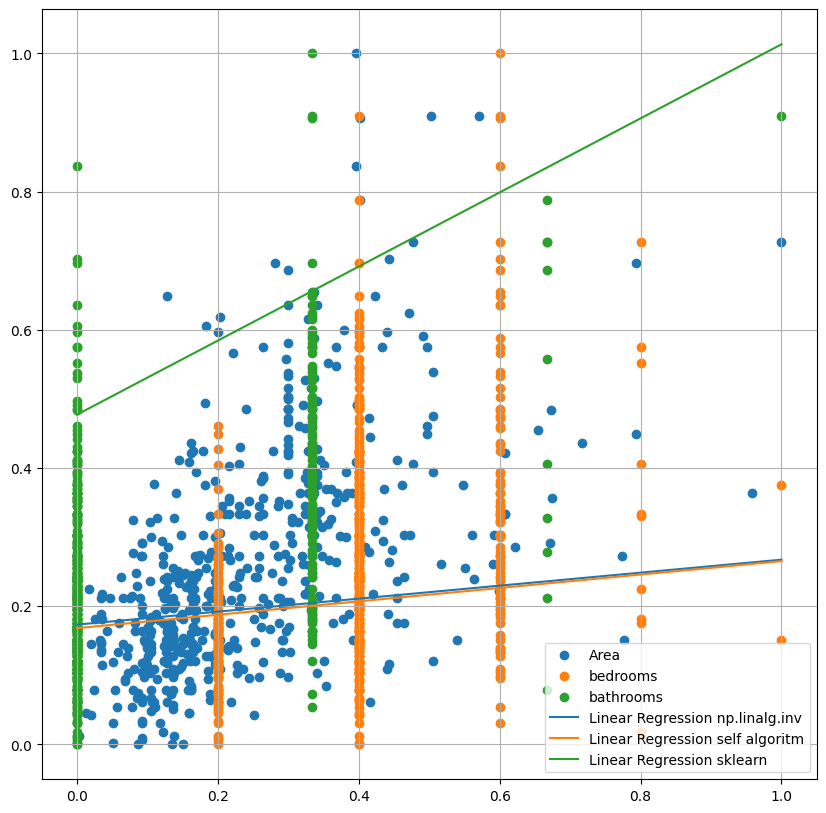

In [52]:
plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], y, label='Area')
plt.scatter(X[:, 1], y, label='bedrooms')
plt.scatter(X[:, 2], y, label='bathrooms')

plt.plot([0,1], [predict(w[0], w[1], w[2], i) for i in [0,1]], label='Linear Regression np.linalg.inv')
plt.plot([0,1], [predict(w_lr[0], w_lr[1], w_lr[2], i) for i in [0,1]], label='Linear Regression self algoritm')
plt.plot([0,1], [predict(0.47714269, 0.17611257, 0.36001286, i) for i in [0,1]], label='Linear Regression sklearn')

plt.legend()

plt.grid()

In [53]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_regression = LinearRegression()


linear_regression.fit(copy_X, y)

cost(y, linear_regression.predict(copy_X))

0.006713405108514904

In [58]:
linear_regression

LinearRegression()

In [59]:
linear_regression.intercept_, linear_regression.coef_

(-0.9704407151116181, array([0.47714269, 0.17611257, 0.36001286]))